<h1><center> About the MNIST dataset</center></h1>

In our previous notebook, we looked at how to read in the MNIST Dataset from the zip files provided on the MNIST website. Now that we have the image files, we can start to create our neural network that will take in an image from the MNIST dataset and tell us what the number in the image is without using the labels set. 

We can do this in steps, similar to our Iris datset. The first step will be to create the neural network. In this example, we already know how to read and save the images contained in the dataset, so let's use TensorFlow's built in MNIST dataset so we don't have to repeat this operation in this notebook also.

<h1>1. Setup data</h1>

In [1]:
# Import numpy
import numpy as np

# Import tensorflow as tf
import tensorflow as tf

# Import matplotlib as plt
import matplotlib.pyplot as plt

# Run this line to prevent unecessary errors showing when using Tensorflow
tf.logging.set_verbosity(tf.logging.ERROR)

learn = tf.contrib.learn

# Load the mnist dataset from TensorFlow
mnist = learn.datasets.load_dataset('mnist')

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


<h1>2. Create training and test set</h1>

* <b>Training Set - 55,000 images<b>
* <b>Test Set - 10,000 images<b>

In [2]:
# Define trainData as the training set of images from MNIST
trainData = mnist.train.images

# Define trainLabels as the training set of labels from MNIST
trainLabels = np.asarray(mnist.train.labels, dtype=np.int32)

# Define testData as the testing set of images from MNIST
testData = mnist.test.images

# Define testData as the testing set of images from MNIST
testLabels = np.asarray(mnist.test.labels, dtype=np.int32)

Let's show an image from the data we just loaded in to make sure everything is working properly. Let's create a function that will do this incase we need to display an image again later on.

In [3]:
def displayImage(i):
    img = testData[i]
    plt.title('Image: %d Label: %d' % (i, testLabels[i]))
    plt.imshow(img.reshape(28,28), cmap=plt.cm.gray_r)



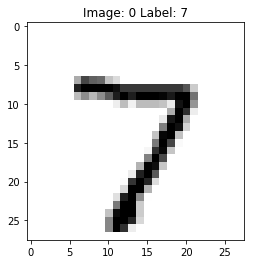

In [4]:
displayImage(0)

Okay, so now we have the dataset set-up correctly. We know this as in our previous notebook, the first image from the MNIST dataset is a 7 and passing in a value of 0 (the first image in the dataset) to our displayImage() function, we can see it shows a seven correctly. Our next step is to create a classifier for our dataset.

<h1>3. Create Classifier</h1>

For this example, we are going to use a <b>linear classififer</b>. Now, you may be asking yourself. What is a linear classifier and why are we using it in this example? I think this is important to understand so I am going to include some information here.

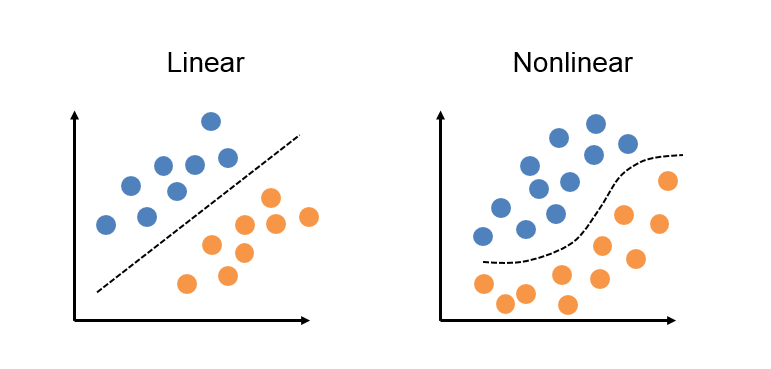

In [5]:
# Create a variable called feature_columns
# https://www.tensorflow.org/guide/feature_columns
feature_columns = learn.infer_real_valued_columns_from_input(trainData)

# Create our classifier using TensorFlow's LinearClassifier function
# We give this classifier 10 classes as the there are 10 outputs for our dataset (0..9)
classifier = learn.LinearClassifier(feature_columns=feature_columns, n_classes=10)

# Tell TensorFlow to fit the classifier with the training set and corresponding labels in batches of 100
# https://www.tensorflow.org/api_docs/python/tf/keras/models/Model#fit
classifier.fit(trainData, trainLabels, batch_size=100, steps=1000)

LinearClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x000001E0DC2659B0>, 'feature_columns': [_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None)], 'optimizer': None, 'gradient_clip_norm': None, 'joint_weights': False})

<h1>4. Evaluate Accuracy</h1>

In [6]:
# Evaluate the accuray of our classifier after using the fit function above
# https://www.tensorflow.org/api_docs/python/tf/contrib/learn/evaluate
classifier.evaluate(testData, testLabels)

# Print the accuracy of our fit method as a percentage
percentageAccuracy = (classifier.evaluate(testData, testLabels)["accuracy"])
print(percentageAccuracy)

0.9216


We can see the accuracy lies at around 90 percent. This is good and a better score could be achieved by using deep learning. For now, we are happy with this score so let's see if it actually is accurate by using TensorFlows predict function a few images that we know the correct output.

<h1>5. Test with sample images</h1>

Predicted:  [7]


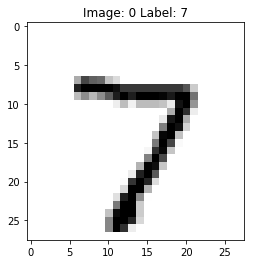

In [23]:
# Create a varible that can we can change easily to select an image
imageNum = 1

# Make a prediction using Tensorflow and our classifier we created above 
prediction = classifier.predict(np.array([testData[imageNum]], dtype=float), as_iterable=False)
print("Predicted: ", prediction)
displayImage(0)

<h3> References</h3>

* [Classifying Handwritten Digits with TF.Learn - Machine Learning Recipes](https://www.youtube.com/watch?v=Gj0iyo265bc)

* [MNIST Website](http://yann.lecun.com/exdb/mnist/)

* [Handling the MNIST Datset](https://github.com/datapythonista/mnist)

* [Writing images using OpenCV](https://docs.opencv.org/2.4/doc/tutorials/introduction/load_save_image/load_save_image.html)